In [50]:
import matplotlib.pyplot as plt
import numpy as np
from Q_Learning import evaluate, train, make_QTables
from extended_pd import parallel_env

In [51]:
env = parallel_env()

# Values of gamma to test
gamma_values = [0.8, 0.9, 0.95, 0.99]

# Lists to store results for each gamma
mean_rewards_list = []

In [52]:
trials = 1

tot_rew = []

for t in range(trials):

    tot_rew_per_episode = []

    for gamma in gamma_values:
        alfa = 0.01
        adecay = 0.0001
        env = parallel_env()
        observations, infos = env.reset()
        qtables = make_QTables(env, gamma)
        qtables,tot_rew_per_gamma = train(env, 100000, 0, 0.2, 0.000006, 100, qtables, gamma, alfa, adecay)
        tot_rew_per_episode.append(tot_rew_per_gamma)
    
    tot_rew.append(tot_rew_per_episode)

In [56]:
print(tot_rew)

[[[0.2822222222222222, 0.35222222222222216, 0.3577777777777777, 0.3477777777777777, 0.37666666666666654, 0.3455555555555554, 0.35555555555555546, 0.3388888888888888, 0.342222222222222, 0.37111111111111095, 0.3688888888888888, 0.33333333333333326, 0.3844444444444443, 0.37333333333333324, 0.3599999999999999, 0.33555555555555544, 0.3366666666666665, 0.34444444444444433, 0.37111111111111095, 0.3344444444444445, 0.30555555555555536, 0.32555555555555543, 0.3033333333333332, 0.33222222222222214, 0.31666666666666654, 0.3133333333333331, 0.341111111111111, 0.3155555555555554, 0.3799999999999999, 0.3633333333333333, 0.3766666666666665, 0.36222222222222217, 0.41999999999999976, 0.36333333333333323, 0.32444444444444437, 0.34444444444444433, 0.40777777777777763, 0.3677777777777777, 0.3822222222222221, 0.36333333333333334, 0.37999999999999984, 0.3844444444444444, 0.38999999999999985, 0.3744444444444443, 0.3266666666666666, 0.3888888888888888, 0.3922222222222221, 0.4188888888888887, 0.391111111111110

In [57]:
my_array = np.array(tot_rew)

my_array.shape

(1, 4, 100000)

In [60]:
average_payoffs = np.mean(my_array, axis=0)

average_payoffs.shape

(4, 100000)

In [61]:
average_payoffs

array([[0.28222222, 0.35222222, 0.35777778, ..., 0.86888889, 0.86777778,
        0.87      ],
       [0.30777778, 0.31888889, 0.34222222, ..., 0.44111111, 0.44222222,
        0.44      ],
       [0.3       , 0.33222222, 0.32      , ..., 0.33222222, 0.33222222,
        0.32888889],
       [0.24222222, 0.22333333, 0.24222222, ..., 0.33111111, 0.33      ,
        0.33333333]])

In [62]:
average_payoffs = np.transpose(average_payoffs)

average_payoffs.shape

(100000, 4)

In [63]:
average_payoffs

array([[0.28222222, 0.30777778, 0.3       , 0.24222222],
       [0.35222222, 0.31888889, 0.33222222, 0.22333333],
       [0.35777778, 0.34222222, 0.32      , 0.24222222],
       ...,
       [0.86888889, 0.44111111, 0.33222222, 0.33111111],
       [0.86777778, 0.44222222, 0.33222222, 0.33      ],
       [0.87      , 0.44      , 0.32888889, 0.33333333]])

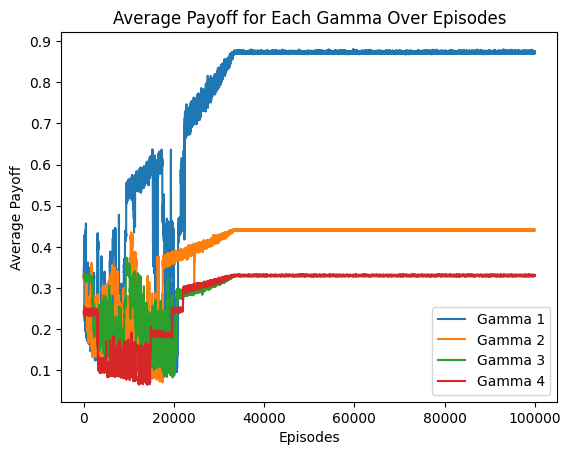

In [66]:
# Calculate the average payoff for each gamma
average_payoffs = np.mean(my_array, axis=0)

# Transpose the array for plotting
average_payoffs = np.transpose(average_payoffs)

# Set the window size for smoothing the plot
window_size = 2000

# Create a plot
fig, ax = plt.subplots()

# Plot each line for different gammas with smoothing
for i in range(average_payoffs.shape[1]):
    smoothed_values = np.convolve(average_payoffs[:, i], np.ones(window_size)/window_size, mode='valid')
    ax.plot(smoothed_values, label=f'Gamma {i+1}')

# Set labels and title
ax.set_xlabel('Episodes')
ax.set_ylabel('Average Payoff')
ax.set_title('Average Payoff for Each Gamma Over Episodes')

# Add legend
ax.legend()

# Show the plot
plt.show()